Please find below the Project 2 for Unsupervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
 
Link to the case file: vehicle.csvView in a new window

 
The points distribution for this case is as follows:
1. Use a new Python notebook and read the data set. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

In [72]:
vehicle_df=pd.read_csv("vehicle_un.csv")

In [73]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [74]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [75]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [47]:
#Features seeming okay at first glance and we can see that there are missing values ,
#there seem to be no evident outlier, but we need to check that with data distribution.

In [76]:
missing_values = ["n/a", "na", "--","NAN", "?"]
vehicle_df = vehicle_df.replace(missing_values, np.nan)
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [77]:
#here number of missing values so we will use Back-fill or forward-fill to propagate next or 
#previous values respectively because
#imputing with mean median are very much influnced by outliers 
vehicle_df.fillna(method='bfill', axis=0,inplace= True)

In [78]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

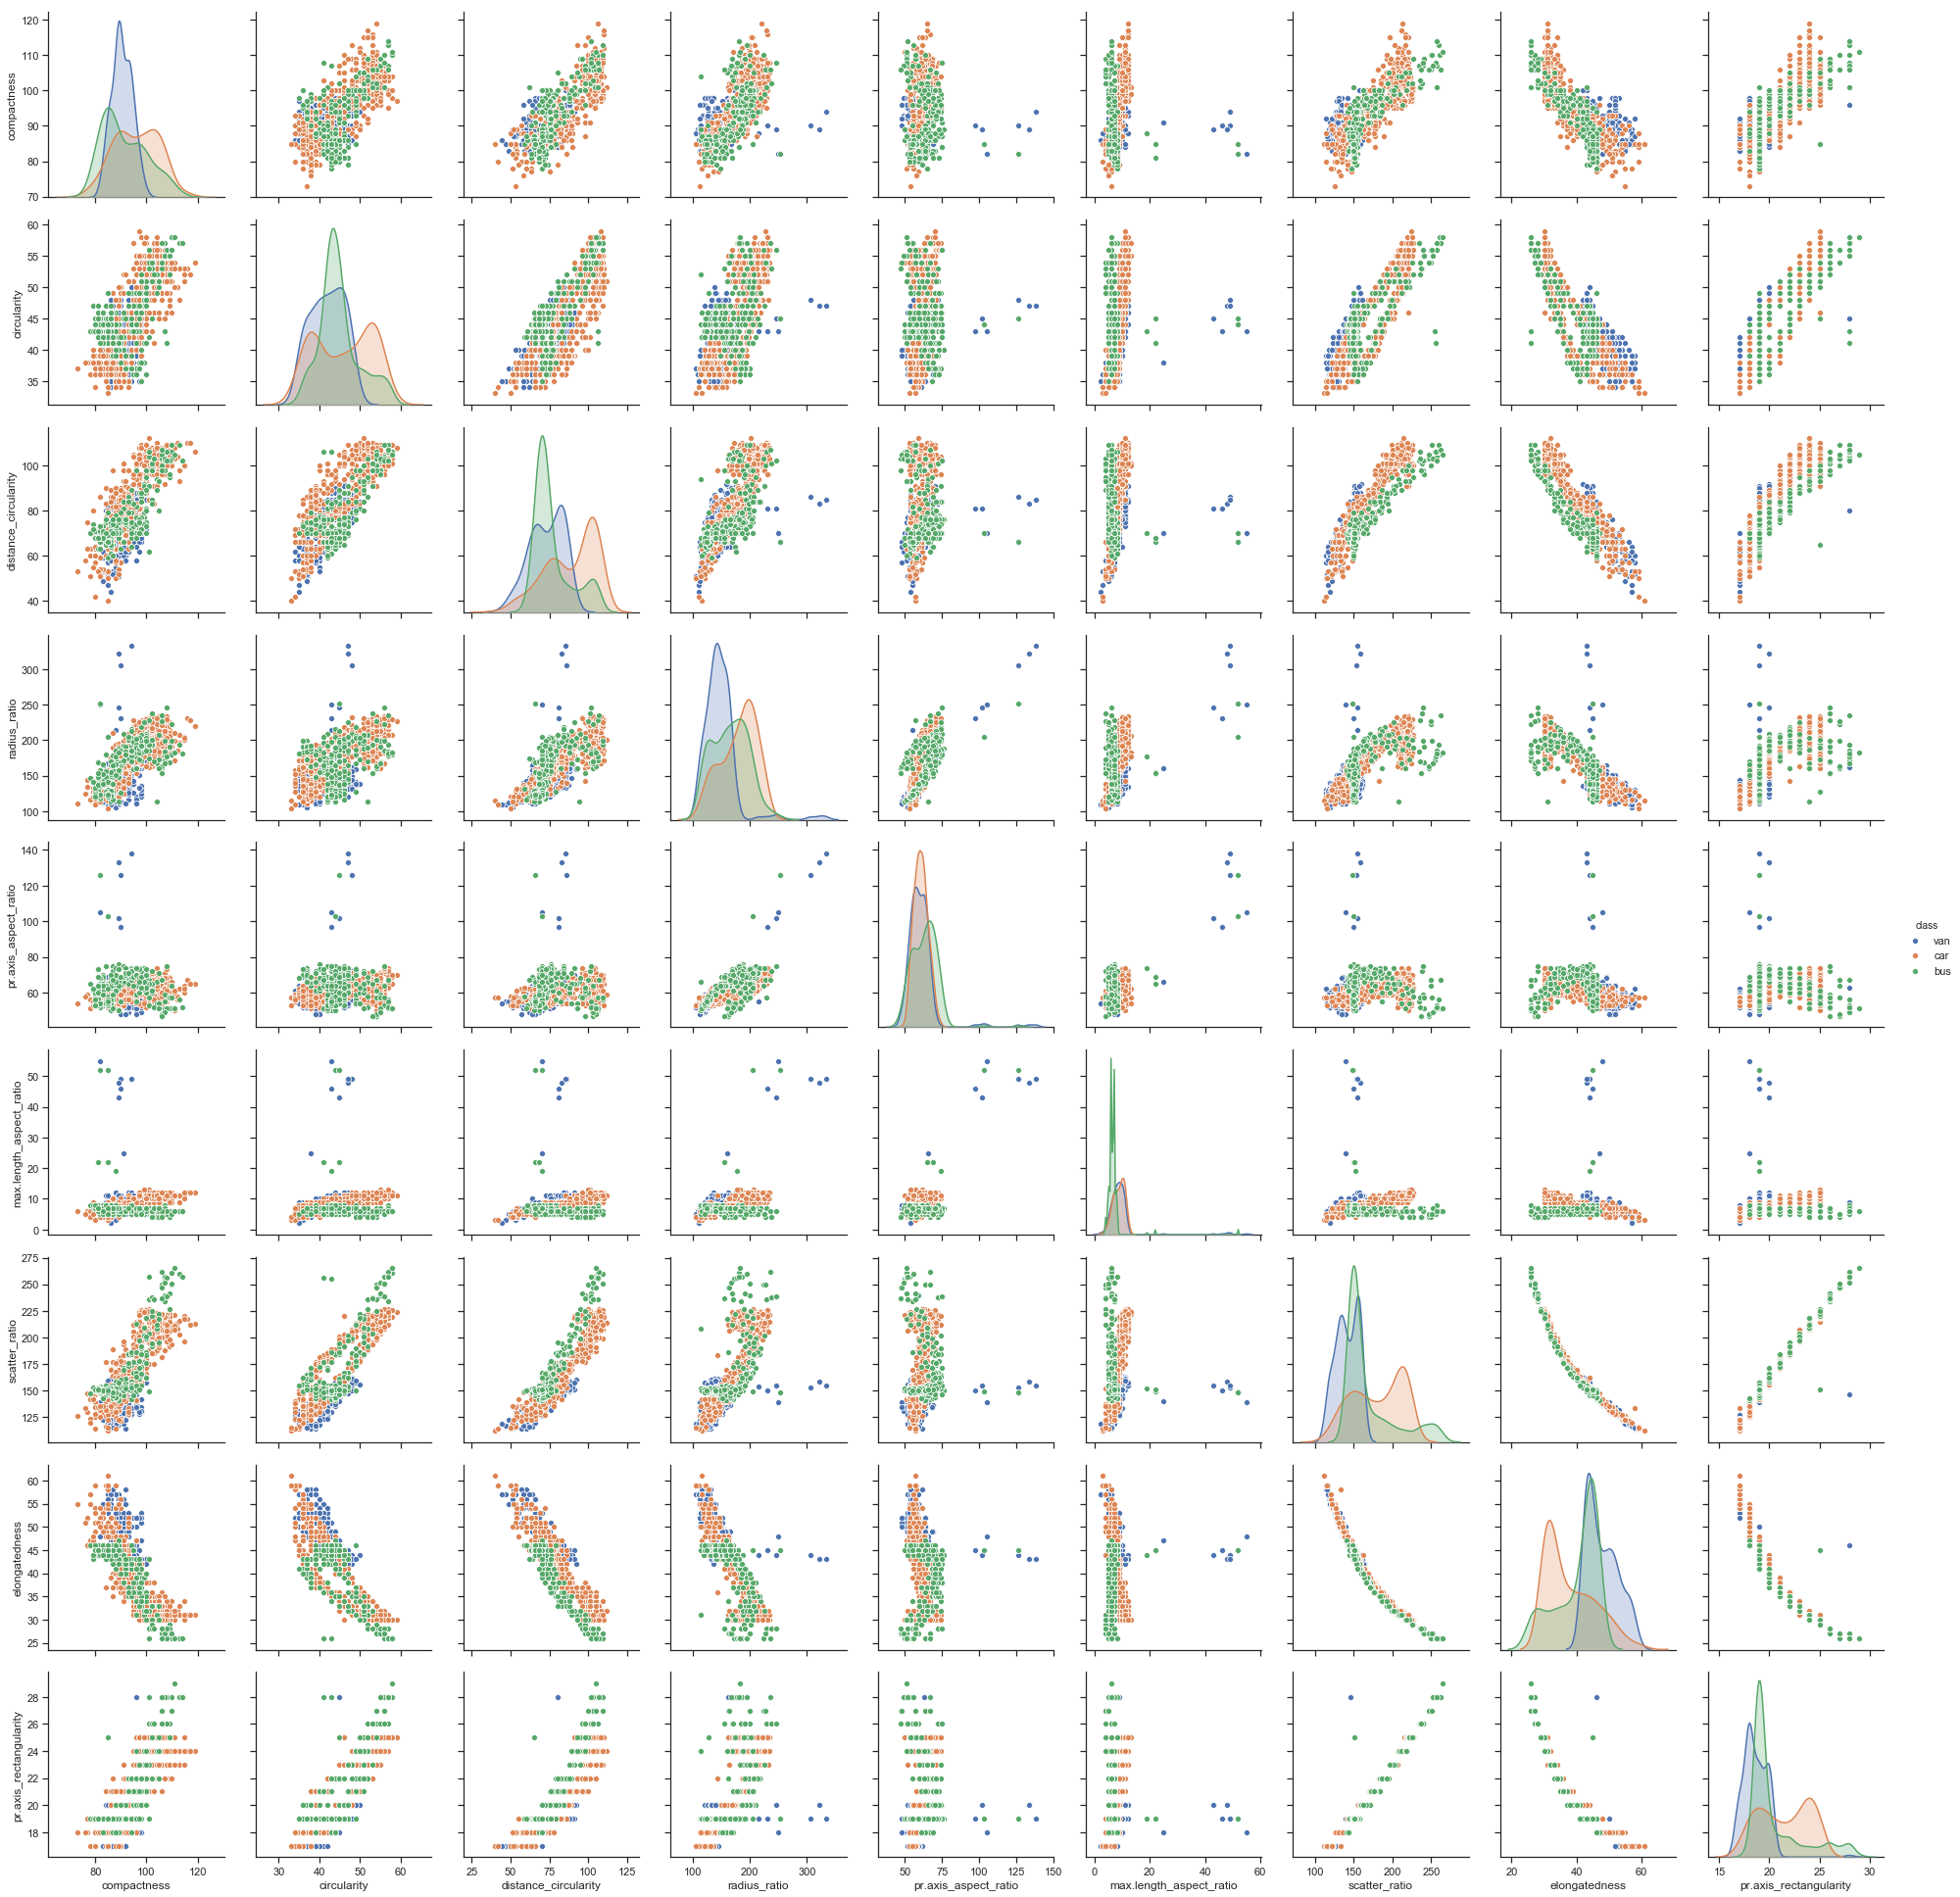

In [51]:
#straight away plotting the pair plot for the features wanting to study further
sns.pairplot(vehicle_df,
 vars=["compactness", "circularity", "distance_circularity", "radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio","scatter_ratio","elongatedness","pr.axis_rectangularity"],
 height = 3,
 diag_kind="kde", hue="class")

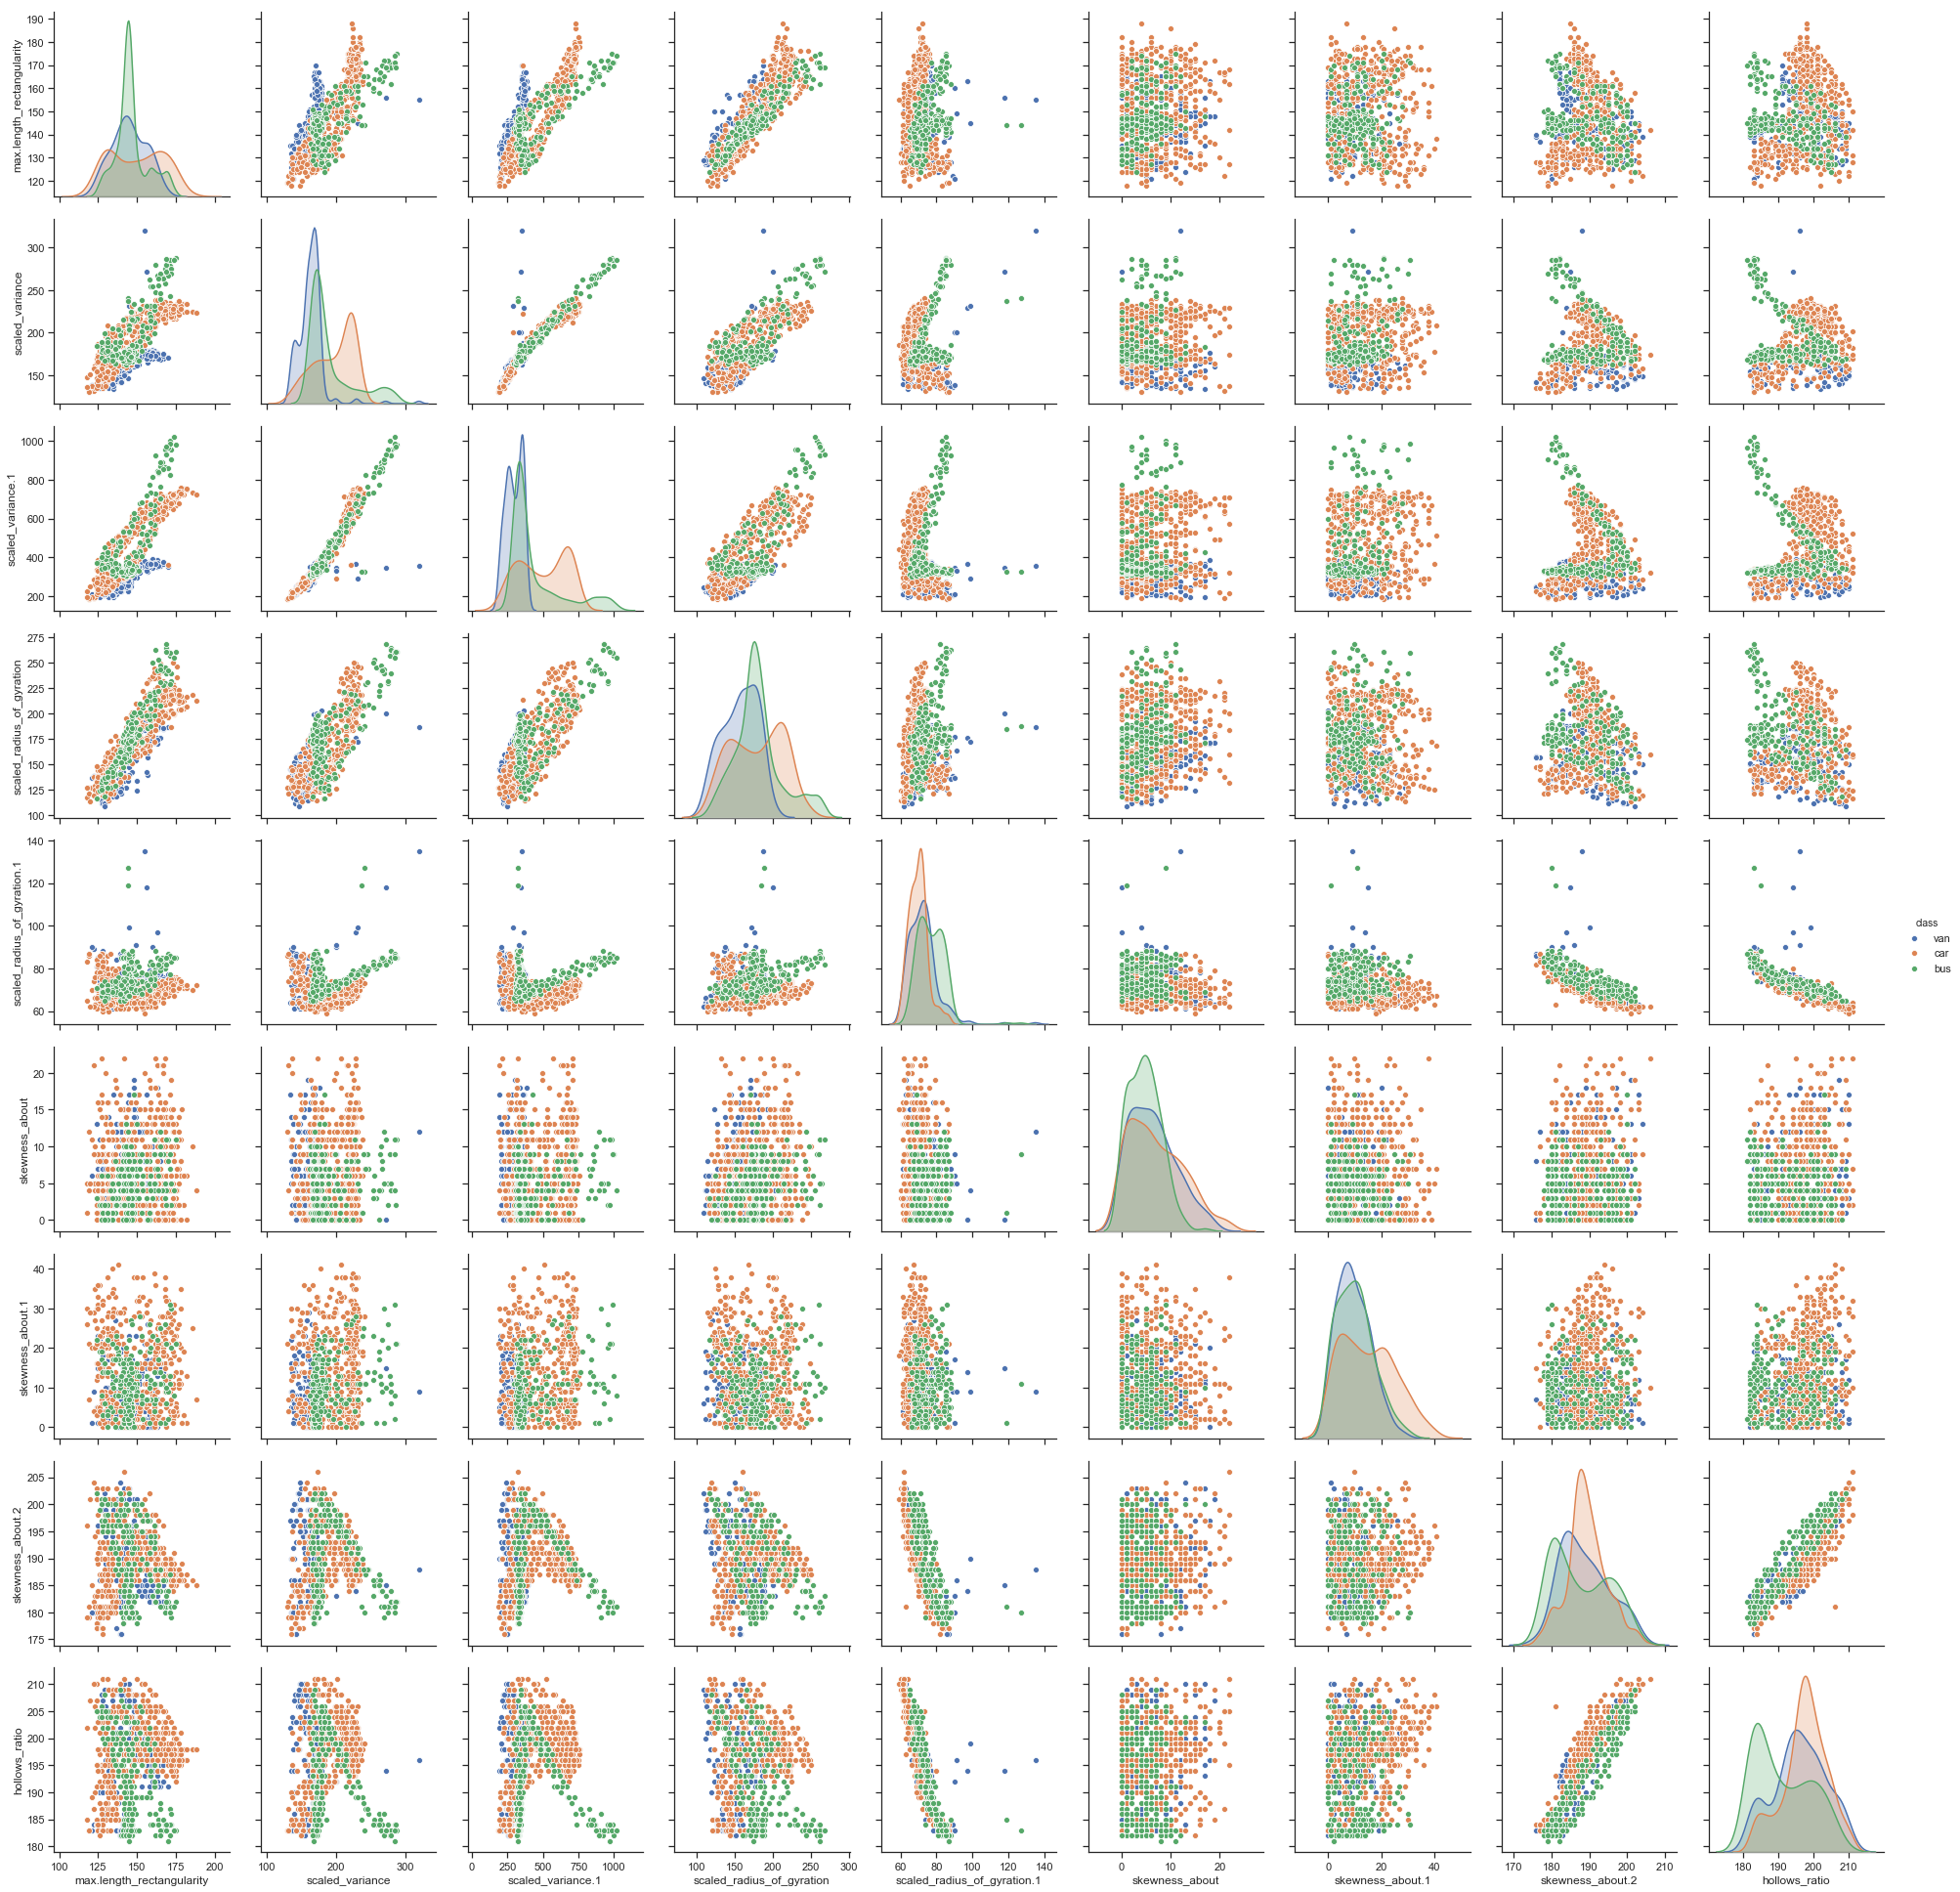

In [52]:
sns.pairplot(vehicle_df,
 vars=["max.length_rectangularity","scaled_variance","scaled_variance.1","scaled_radius_of_gyration","scaled_radius_of_gyration.1","skewness_about","skewness_about.1","skewness_about.2","hollows_ratio"],
 height = 3,
 diag_kind="kde", hue="class")


In [55]:
#from the above pairplot it can be seen that there a variours variables which are highly corelated hence 
# There are multimodal peaks for all 3 class 
############################################
#"compactness", "circularity", "distance_circularity", "radius_ratio","pr.axis_aspect_ratio",
#"max.length_aspect_ratio","scatter_ratio","elongatedness","pr.axis_rectangularity"
#"max.length_rectangularity","scaled_variance","scaled_variance.1","scaled_radius_of_gyration",
#"scaled_radius_of_gyration.1","skewness_about","skewness_about.1","skewness_about.2","hollows_ratio"



('scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio')

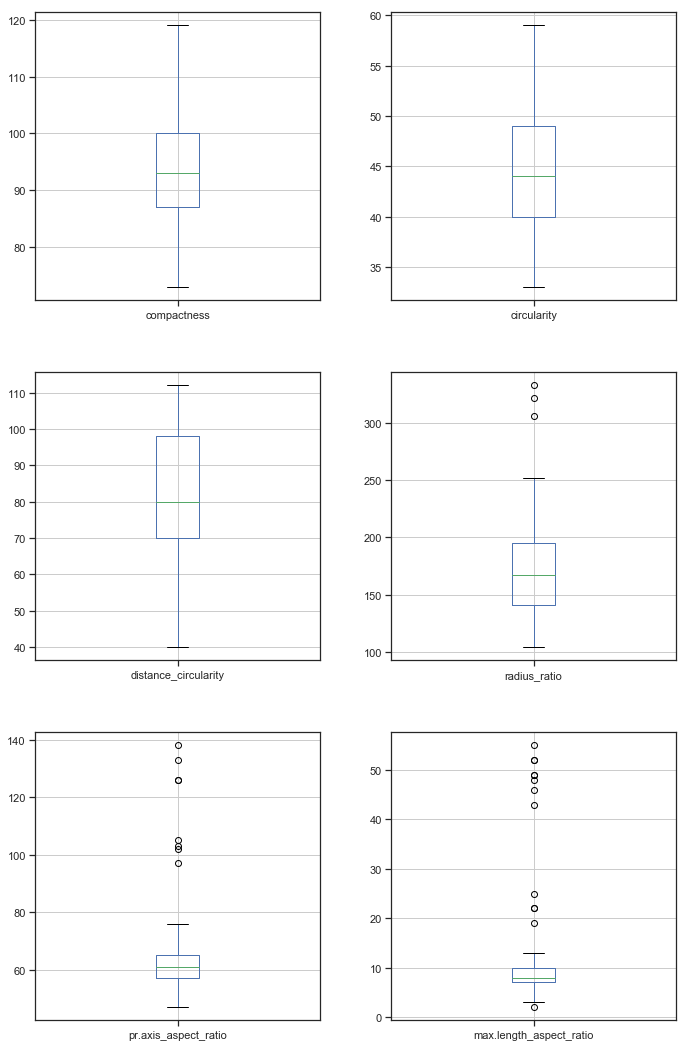

In [79]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
fig, axes = plt.subplots(3,2,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(vehicle_df.columns.values)[0:6]):
    a =vehicle_df.boxplot(el,ax=axes.flatten()[i])

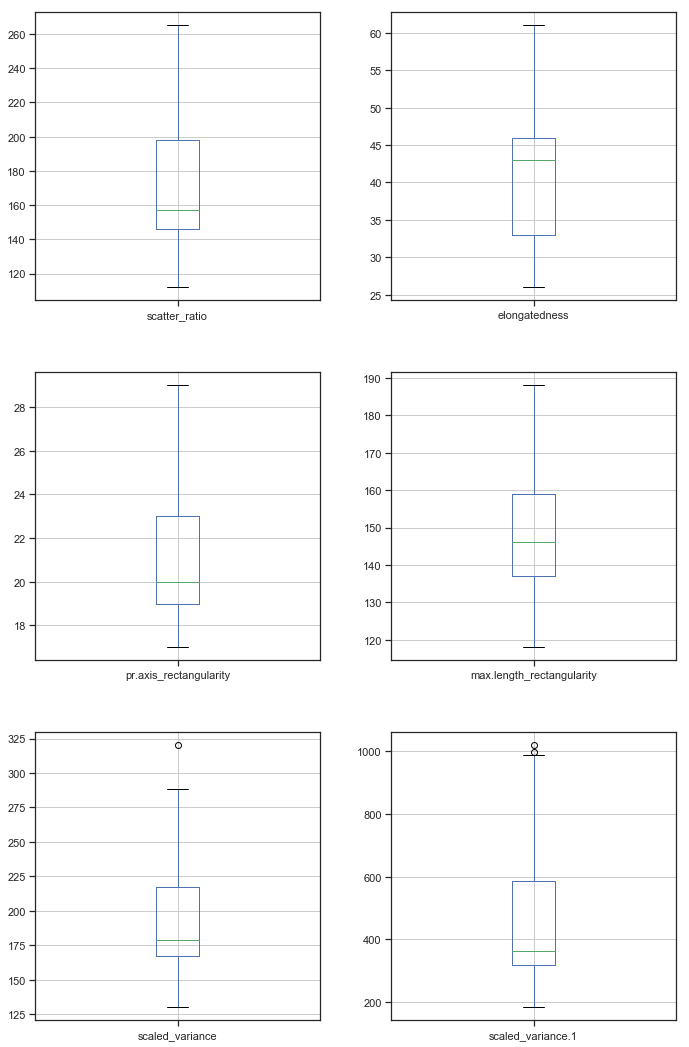

In [80]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
fig, axes = plt.subplots(3,2,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(vehicle_df.columns.values)[6:12]):
    a =vehicle_df.boxplot(el,ax=axes.flatten()[i])

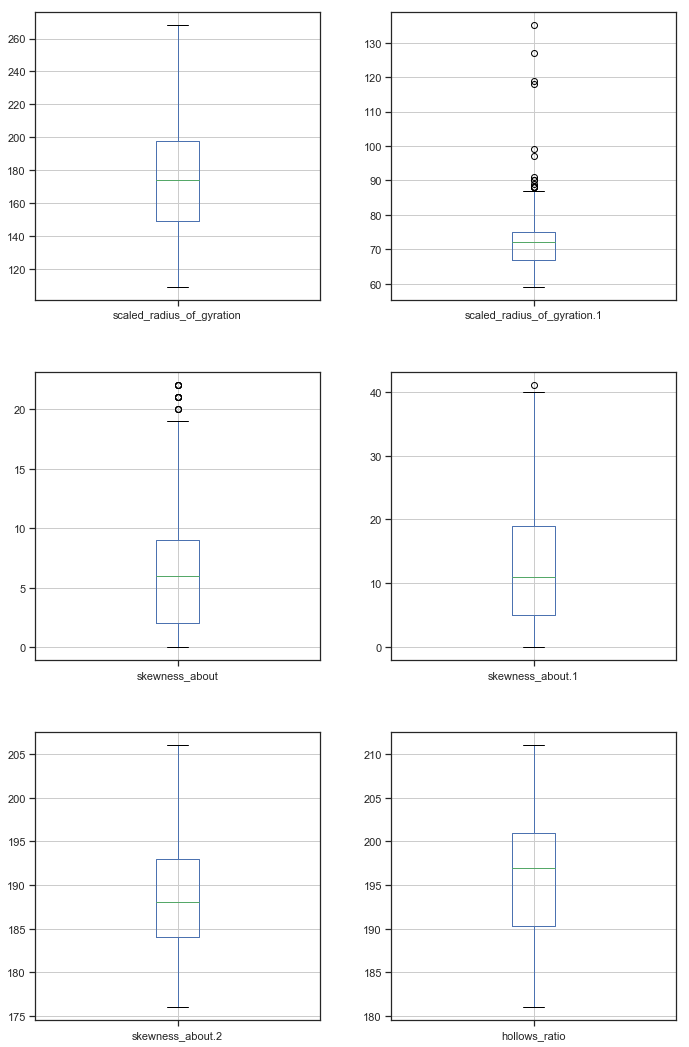

In [81]:
fig, axes = plt.subplots(3,2,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(vehicle_df.columns.values)[12:18]):
    a =vehicle_df.boxplot(el,ax=axes.flatten()[i])

In [37]:
#from the above boxplot it is evident that "radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio","scaled_variance","scaled_variance.1","scaled_radius_of_gyration.1","skewness_about","skewness_about.1"
#have outliers, which we have to remove.
#separating the class column so that we can do arithmatic operation.

In [82]:
df1 =  vehicle_df.drop("class", axis=1)
df2 =  vehicle_df.pop("class")


In [89]:
#columns=[ "radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio","scaled_variance","scaled_variance.1","scaled_radius_of_gyration.1","skewness_about","skewness_about.1"]
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr=q3-q1
cap1 = q1-1.5*iqr
cap2 = q3+1.5*iqr
df1 =df1[(df1>=cap1) & (df1<=cap2)]
#here number of missing values so we will use Back-fill or forward-fill to propagate next or 
#previous values respectively because
#imputing with mean median are very much influnced by outliers 
df1.fillna(method='ffill', axis=0,inplace= True)

In [98]:
vehicle_df=df1
vehicle_df["class"]=df2
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

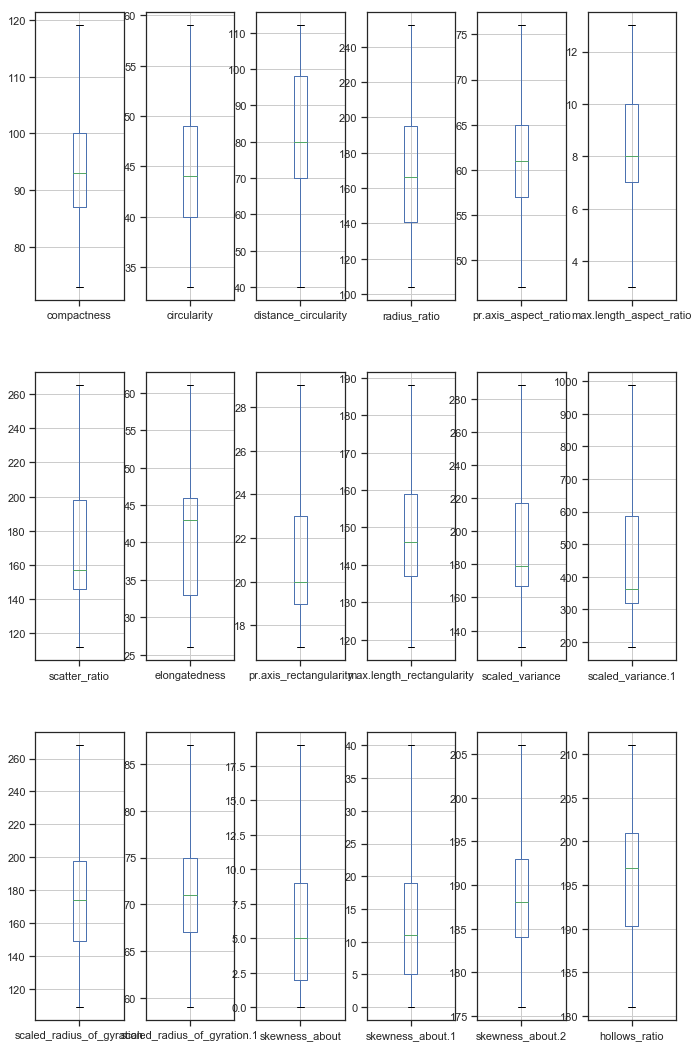

In [99]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
fig, axes = plt.subplots(3,6,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(vehicle_df.columns.values)[0:18]):
    a =vehicle_df.boxplot(el,ax=axes.flatten()[i])

In [ ]:
vehicle_df.head()

Bivariate analysis

In [100]:
def plot_correlation(df, method='pearson', min_periods=1, figsize=(20, 16)):
    """
    Plot the bottom half below the diagonal of the pairwise correlation between numeric
    columns, excluding NA/null values
    
    df : Dataframe with the data
    
    method : str; Default='pearson'. Allowed={‘pearson’, ‘kendall’, ‘spearman’}
             - pearson : standard correlation coefficient
             - kendall : Kendall Tau correlation coefficient
             - spearman : Spearman rank correlation
    
    min_periods : int; Default=1
                  Minimum number of observations required per pair of columns to have a 
                  valid result. Currently only available for pearson and spearman correlation.
    
    figsize : Tuple of ints - (width, height); Default=(10,8)
    """
    corr = df.corr(method=method, min_periods=min_periods)

    plt.figure(figsize=figsize)
    cmap = cmap=sns.diverging_palette(250, 5,n=9, as_cmap=True)
    sns.heatmap(np.tril(corr), 
                vmin=-1, 
                vmax=1,
                center=0,
                cmap=cmap, 
                annot=True,
                cbar=True,
                square=True,
                xticklabels=corr.columns,
                yticklabels=corr.columns)
    plt.show()

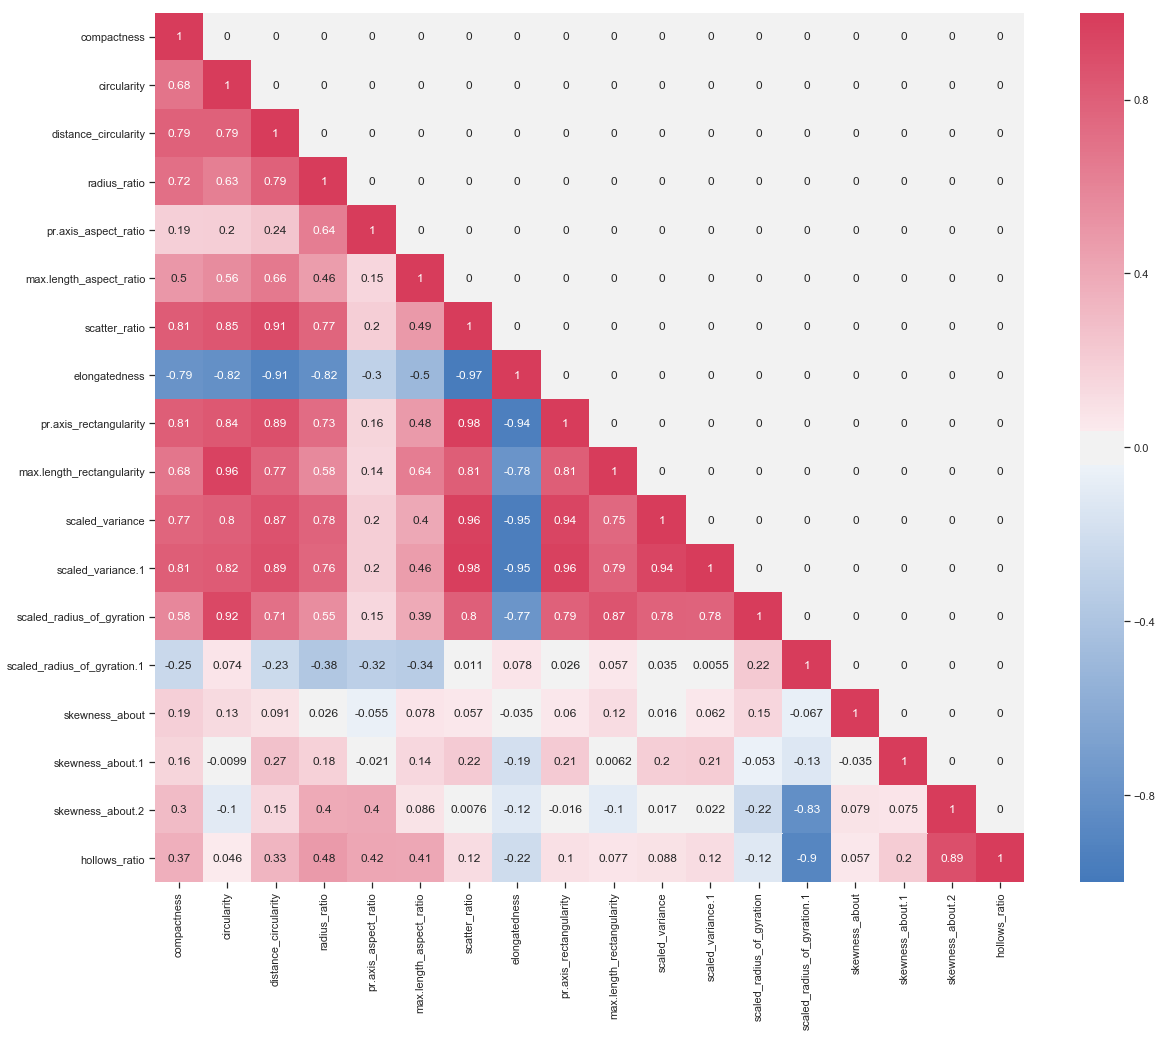

In [101]:
plot_correlation(vehicle_df)

In [ ]:
#from the above corelation matrix we can see that "compactness", "circularity", "distance_circularity", "radius_ratio",
#"max.length_aspect_ratio","scatter_ratio","elongatedness","pr.axis_rectangularity"
#"max.length_rectangularity","scaled_variance","scaled_variance.1","scaled_radius_of_gyration" are highly co-related

In [103]:
#separating independent and dependent variables to apply PCA
#we have to find how many pca_components we need to apply
X = vehicle_df.drop(["class"], axis=1)
Y = vehicle_df["class"]
X.shape

(846, 18)

In [105]:
from sklearn.preprocessing import StandardScaler
# PCA
#Create covariance matrix
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
# Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

F:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


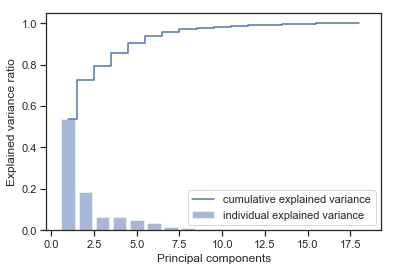

In [108]:
# Sort eigenvalues in descending order
# Making a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [131]:
#from the above graph we can see that we are able to explain the maximum variance with 7 pca components.
from sklearn.decomposition import PCA
X_centered = X - X.mean(axis=0)
pca = PCA(n_components=7)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
X_pca.shape

(846, 7)

F:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


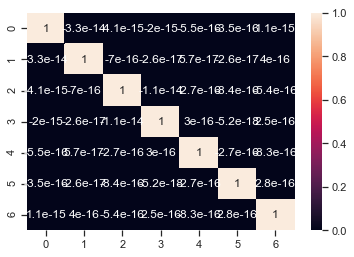

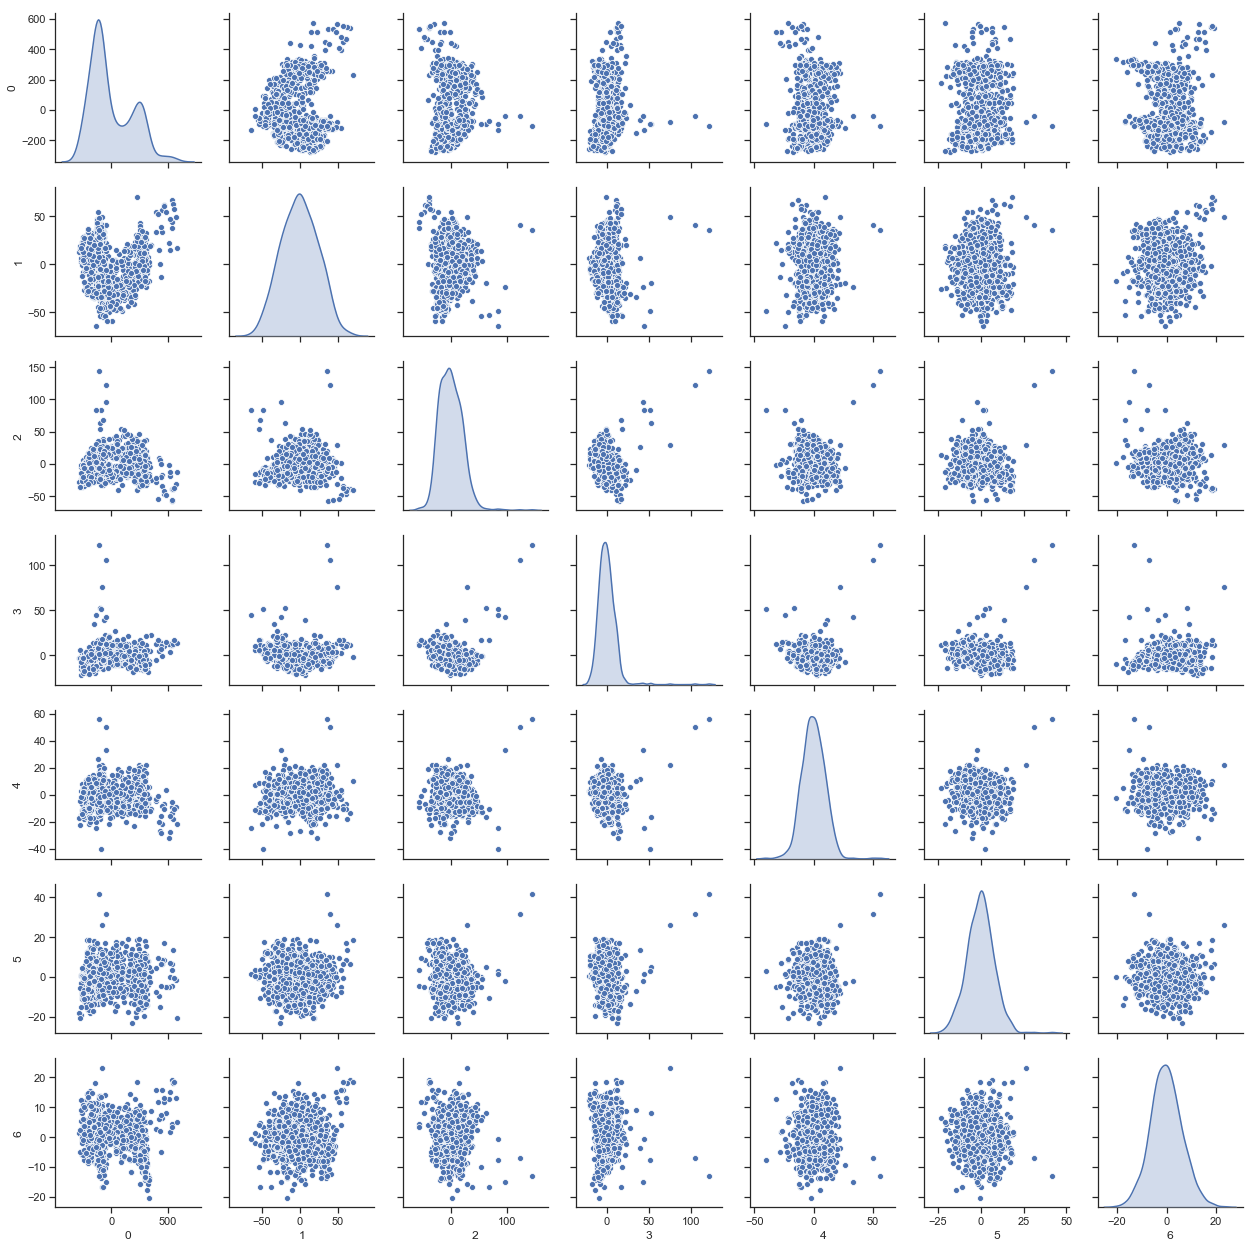

In [132]:
vehicle_new_df=pd.DataFrame(X_pca)
sns.heatmap(vehicle_new_df.corr(), annot=True)

#after doing PCA it can be observed that the correlation among PCA components has reduced and is almost 0.
sns.pairplot(vehicle_new_df, diag_kind='kde') 

Applying SVM

In [133]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(vehicle_new_df, Y, test_size=test_size, random_state=seed)

In [134]:
from sklearn.svm import SVC
svc =SVC()

svc.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: ', svc.score(X_train, Y_train))

print('Accuracy of linear SVC on test set: {:.2f}'.format(svc.score(X_test, Y_test)))

F:\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of linear SVC on training set:  1.0
Accuracy of linear SVC on test set: 0.50


In [140]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.metrics import classification_report

param_grid = {'kernel': ('linear', 'rbf'),'C': [ 0.01, 0.05, 0.5,0.075, 1.0,1.5,2]}
    
grid = GridSearchCV(svc, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, Y_test) * 100 ) )

The best parameters are {'C': 0.01, 'kernel': 'linear'} with a score of 77
Best estimator accuracy on test set 81.89 


In [145]:
svc_best =SVC(C=0.01, kernel='linear')

svc_best.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: ', svc_best.score(X_train, Y_train))

print('Accuracy of linear SVC on test set: {:.2f}'.format(svc_best.score(X_test, Y_test)))

Accuracy of linear SVC on training set:  0.7922297297297297
Accuracy of linear SVC on test set: 0.82


Cross Validation

In [142]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)

In [147]:
accuracy = cross_val_score(svc_best, X_train, Y_train, scoring='accuracy',cv=10)
print(accuracy)

[0.80327869 0.80327869 0.74576271 0.6779661  0.77966102 0.76271186
 0.81355932 0.79661017 0.77586207 0.84482759]


In [150]:
i = 1
train_score = []
test_score = []
for train_index,test_index in kf.split(vehicle_new_df,Y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = vehicle_new_df.loc[train_index],vehicle_new_df.loc[test_index]
    ytr,yvl = Y.loc[train_index],Y.loc[test_index]
    
    #model
    svc_bestn=SVC(C= 0.01, kernel= 'linear')
    svc_bestn.fit(xtr,ytr)
    svc_bestn.predict(xvl)
    print(svc_bestn.score(xtr, ytr))
    print(svc_bestn.score(xvl, yvl))
    train_score.append(svc_bestn.score(xtr, ytr))
    test_score.append(svc_bestn.score(xvl, yvl))
    i+=1

1 of KFold 5
0.8062130177514792
0.7823529411764706
2 of KFold 5
0.7988165680473372
0.7941176470588235
3 of KFold 5
0.8091715976331361
0.7529411764705882
4 of KFold 5
0.7961595273264401
0.7988165680473372
5 of KFold 5
0.7952871870397643
0.8083832335329342


In [151]:
from statistics import mean
print('Mean train Score:', mean(train_score))
print('Mean test Score:', mean(test_score))

Mean train Score: 0.8011295795596314
Mean test Score: 0.7873223132572308


In [ ]:
#After applying PCA, 7 PCA components were selected which covered almost 95% variance. 
#Applying SVM on PCA data, accuracy score was 78%.